## Adeniyi Adeleke MiniProject 4

In [1]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

Loading the Data and Label files

In [2]:
# secom data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
secom_data = pd.read_csv(url, header=None, delim_whitespace=True)

# renaming the columns
k=1
while k< 592:
  p=k-1
  newc= 'C' +str(p)
  secom_data.rename(columns ={p:newc}, inplace =True)
  k=k+1
secom_data.head()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C580,C581,C582,C583,C584,C585,C586,C587,C588,C589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [3]:
# secom label
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
label = pd.read_csv(url, header= None, usecols=[0], delim_whitespace =True)  #squeeze=True
# Renaming the column
last_column = label.columns[0]
new_column_name = 'Pass/Fail'
label = label.rename(columns={last_column:new_column_name})
label.head()

,Pass/Fail
0,-1
1,-1
2,1
3,-1
4,-1


In [4]:
# Print the number of rows/observations and columns/(independent variables and target) in the dataset
print('The secom dataset has {} number of instances and {} number of attributes.'\
      .format(secom_data.shape[0],secom_data.shape[1]))

The secom dataset has 1567 number of instances and 590 number of attributes.


In [5]:
secom_df = pd.concat([secom_data, label], axis =1)
secom_df.head(-5)

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C581,C582,C583,C584,C585,C586,C587,C588,C589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1557,3072.10,2534.87,2177.4333,2945.8855,1.3321,100.0,83.1700,0.1253,1.4359,-0.0114,...,26.7330,0.5010,0.0132,0.0035,2.6249,0.0277,0.0074,0.0023,26.7330,-1
1558,3012.30,2466.84,2217.4111,1032.2836,1.4802,100.0,101.3511,0.1195,1.3832,0.0042,...,176.6783,0.4993,0.0130,0.0037,2.5976,0.0097,0.0172,0.0054,176.6783,-1
1559,3076.33,2456.13,2217.4111,1032.2836,1.4802,100.0,101.3511,0.1195,1.3120,-0.0043,...,117.4564,0.4960,0.0157,0.0036,3.1743,0.0150,0.0176,0.0057,117.4564,-1
1560,2770.40,2549.42,2204.2889,2637.9989,1.5549,100.0,86.1089,0.1234,1.2811,0.0037,...,127.3154,0.5009,0.0155,0.0036,3.0997,0.0105,0.0133,0.0042,127.3154,-1


Finding the missing values

In [6]:
# missing values
secom_df.isnull().sum()

C0            6
C1            7
C2           14
C3           14
C4           14
             ..
C586          1
C587          1
C588          1
C589          1
Pass/Fail     0
Length: 591, dtype: int64

*Cleaning the Data*

In [7]:
secom_df.dropna(thresh=secom_data.shape[0]*0.5, inplace=True, axis =1)

In [8]:
secom_df.isnull().sum()

C0            6
C1            7
C2           14
C3           14
C4           14
             ..
C586          1
C587          1
C588          1
C589          1
Pass/Fail     0
Length: 563, dtype: int64

In [9]:
secom_df.dropna(inplace=True)

In [10]:
missing_values = secom_df.isnull()

# Print out the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values.sum())

# Print out the rows where missing values exist
print("Rows with missing values:")
print(secom_df[missing_values.any(axis=1)])

Number of missing values in each column:
C0           0
C1           0
C2           0
C3           0
C4           0
            ..
C586         0
C587         0
C588         0
C589         0
Pass/Fail    0
Length: 563, dtype: int64
Rows with missing values:
Empty DataFrame
Columns: [C0, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, C15, C16, C17, C18, C19, C20, C21, C22, C23, C24, C25, C26, C27, C28, C29, C30, C31, C32, C33, C34, C35, C36, C37, C38, C39, C40, C41, C42, C43, C44, C45, C46, C47, C48, C49, C50, C51, C52, C53, C54, C55, C56, C57, C58, C59, C60, C61, C62, C63, C64, C65, C66, C67, C68, C69, C70, C71, C74, C75, C76, C77, C78, C79, C80, C81, C82, C83, C84, C86, C87, C88, C89, C90, C91, C92, C93, C94, C95, C96, C97, C98, C99, C100, C101, C102, ...]
Index: []

[0 rows x 563 columns]


In [11]:
secom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 2 to 1533
Columns: 563 entries, C0 to Pass/Fail
dtypes: float64(562), int64(1)
memory usage: 2.0 MB


Summary Statistics

In [12]:
secom_df.describe()

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C577,C582,C583,C584,C585,C586,C587,C588,C589,Pass/Fail
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.0,461.000000,461.000000,461.000000,461.000000,...,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,3009.782516,2492.564382,2198.348831,1384.855845,1.323305,100.0,100.919223,0.122438,1.471008,-0.000851,...,15.847334,0.500257,0.015564,0.003921,3.119637,0.022158,0.016693,0.005323,101.919695,-0.830803
std,69.634845,77.069367,31.018106,388.162281,0.450070,0.0,5.233356,0.001909,0.069273,0.014819,...,10.958174,0.003614,0.021894,0.004773,4.576385,0.014057,0.008684,0.002747,96.031260,0.557172
min,2792.240000,2162.870000,2060.660000,847.797600,0.681500,100.0,82.246700,0.117100,1.292100,-0.037600,...,4.582000,0.477800,0.006800,0.001800,1.366700,-0.003400,0.003200,0.001000,0.000000,-1.000000
25%,2960.580000,2453.450000,2180.377800,1072.805800,1.003200,100.0,98.756700,0.121100,1.423400,-0.010800,...,11.280000,0.497800,0.011500,0.003100,2.292800,0.013500,0.010600,0.003300,44.007700,-1.000000
50%,3005.640000,2500.260000,2197.644400,1281.786200,1.310100,100.0,101.457800,0.122300,1.469800,-0.000900,...,14.259300,0.500100,0.013700,0.003600,2.744500,0.020700,0.015100,0.004700,71.778000,-1.000000
75%,3055.870000,2533.040000,2218.633300,1602.842700,1.509900,100.0,104.236700,0.123800,1.524200,0.007300,...,16.800200,0.502800,0.016100,0.004000,3.213800,0.027500,0.021000,0.006500,118.304700,-1.000000
max,3299.400000,2728.280000,2280.822200,3085.378100,3.889400,100.0,119.354400,0.127600,1.648600,0.074900,...,96.960100,0.509700,0.471400,0.103900,98.662800,0.102800,0.065100,0.019500,737.304800,1.000000


<AxesSubplot:>

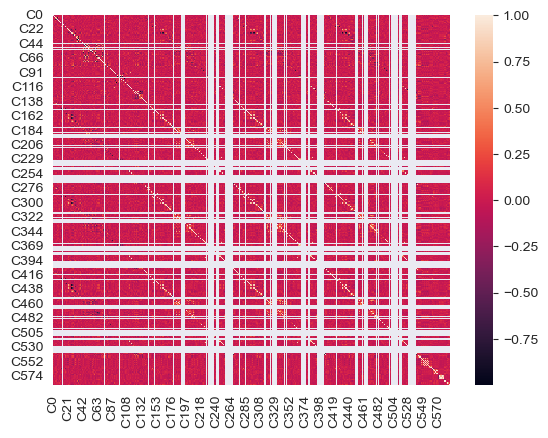

In [13]:
correlations = secom_df.corr()
sns.heatmap(correlations)

Dropping unique values

In [14]:
# dropping unique columns
# count the number of unique values in each column
unique_counts = secom_df.nunique()

# select only the columns with more than one unique value
cols_to_keep = unique_counts[unique_counts > 1].index

# drop the columns with unique values
secom_df = secom_df[cols_to_keep]


In [15]:
# Checking the unique value counts in columns
featureValues={}
for d in secom_df.columns.tolist():
    count=secom_df[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value        
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n []


<AxesSubplot:>

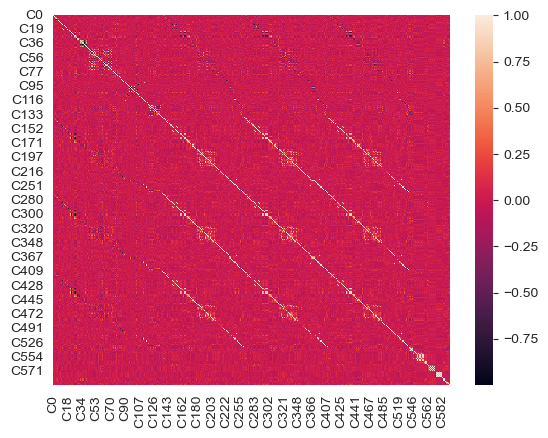

In [16]:
correlations = secom_df.corr()
sns.heatmap(correlations)

In [17]:
# create a mask for upper triangle
mask = np.triu(np.ones_like(correlations, dtype=bool))

# create a filtered correlation matrix excluding the diagonal
filtered_corr_matrix = correlations.mask(mask)

# find the features that are highly correlated with any other feature
correlated_features = set()
for col in filtered_corr_matrix.columns:
    highly_correlated_cols = filtered_corr_matrix.index[filtered_corr_matrix[col].abs() > 0.6] #thresholding to 0.6
    if len(highly_correlated_cols) > 0:
        correlated_features.add(col)

# drop the least correlated features
secom_df = secom_df.drop(correlated_features, axis=1)

<AxesSubplot:>

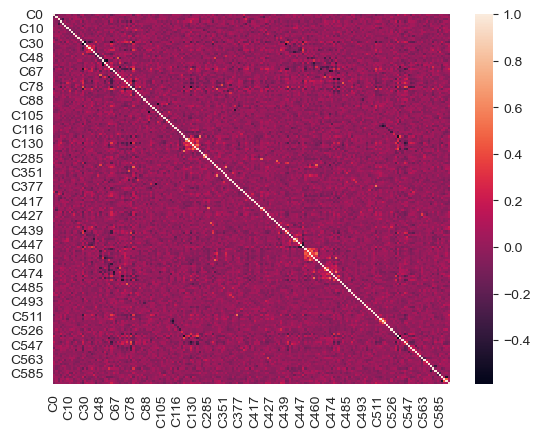

In [18]:
correlations = secom_df.corr()
sns.heatmap(correlations)

In [19]:
secom_df.head(-5)

,C0,C1,C2,C6,C7,C8,C9,C10,C16,C18,...,C569,C570,C571,C577,C582,C585,C586,C588,C589,Pass/Fail
2,2932.61,2559.94,2186.4111,95.4878,0.1241,1.4436,0.0041,0.0013,9.3144,192.7035,...,68.8489,535.0245,2.0293,9.2721,0.4958,3.1745,0.0584,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,104.2367,0.1217,1.4882,-0.0124,-0.0033,9.6924,192.1557,...,25.0363,530.5682,2.0253,8.5831,0.4990,2.0544,0.0202,0.0044,73.8432,-1
5,2946.25,2432.84,2233.3667,100.3967,0.1235,1.5287,0.0167,0.0055,9.2441,191.2280,...,22.5598,534.2091,2.3236,13.7755,0.4949,3.8276,0.0342,0.0052,44.0077,-1
7,3058.88,2690.15,2248.9000,106.2400,0.1185,1.5153,0.0157,0.0007,9.6836,192.7334,...,23.6052,493.0054,2.2008,16.0862,0.4984,2.1261,0.0204,0.0063,95.0310,-1
8,2967.68,2600.47,2248.9000,106.2400,0.1185,1.5358,0.0111,-0.0066,9.7046,192.7498,...,18.2120,535.1818,2.2170,14.2892,0.4993,3.4456,0.0111,0.0045,111.6525,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,3013.32,2538.52,2231.0555,95.7878,0.1198,1.3717,0.0059,0.0011,10.2330,187.5985,...,15.4662,531.6964,2.0737,14.3961,0.4996,2.8294,-0.0006,0.0039,0.0000,-1
1377,3017.35,2580.25,2223.0444,112.5811,0.1229,1.4036,-0.0014,0.0015,9.5071,193.8418,...,20.8583,530.0846,1.9812,13.8979,0.4962,2.1870,0.0261,0.0024,24.0179,-1
1381,2862.69,2593.67,2206.9667,97.1700,0.1216,1.5915,-0.0120,0.0085,9.7622,191.9971,...,26.6292,539.0691,1.3198,60.1633,0.4986,2.6868,0.0295,0.0045,52.2049,-1
1413,2973.39,2528.67,2195.9778,103.2400,0.1234,1.3622,0.0387,-0.0202,9.6971,191.9223,...,24.4074,530.5455,1.9626,20.7331,0.5019,2.6866,0.0378,0.0195,171.9936,-1


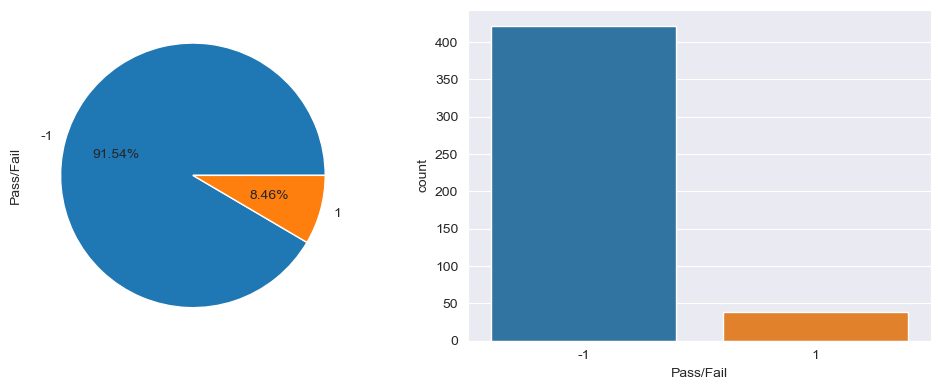

In [20]:
# chart for distribution of target variable
fig= plt.figure(figsize=(10,4))
fig.add_subplot(1,2,1)
a= secom_df["Pass/Fail"].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=secom_df["Pass/Fail"])
plt.tight_layout()
plt.show()

*There is class imbalance because class -1 has more data points than class 1.*

## (C) Logistic Regression

In [23]:
# importing library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X = secom_df.drop('Pass/Fail', axis=1)
Y = secom_df['Pass/Fail']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=95)


In [24]:
# We oversample the data using SMOTE to handle class imbalance
!pip install imblearn
from imblearn.over_sampling import SMOTE
y_train.reset_index(drop=True, inplace=True)
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
y_train.value_counts()

     -------------------------------------- 226.0/226.0 kB 4.7 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


-1    293
 1    293
Name: Pass/Fail, dtype: int64

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [26]:
#lg =LogisticRegression(class_weight={-1:0.9, 1:0.1})
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)

In [27]:
plt.figure(figsize=(4,4))
print("Accuracy: ", accuracy_score(y_test, pred))
print(classification_report(y_test,pred))

Accuracy:  0.8129496402877698
              precision    recall  f1-score   support

          -1       0.93      0.86      0.90       129
           1       0.10      0.20      0.13        10

    accuracy                           0.81       139
   macro avg       0.52      0.53      0.51       139
weighted avg       0.87      0.81      0.84       139



<Figure size 400x400 with 0 Axes>

# Part D

Feature Importance

    feature  importance
26      C59    1.071257
75     C349    0.963890
110    C445    0.919075
87     C411    0.886413
66     C133    0.859680
..      ...         ...
20      C41   -0.692510
173    C577   -0.718857
109    C444   -0.813152
69     C281   -0.884870
167    C562   -0.970233

[179 rows x 2 columns]


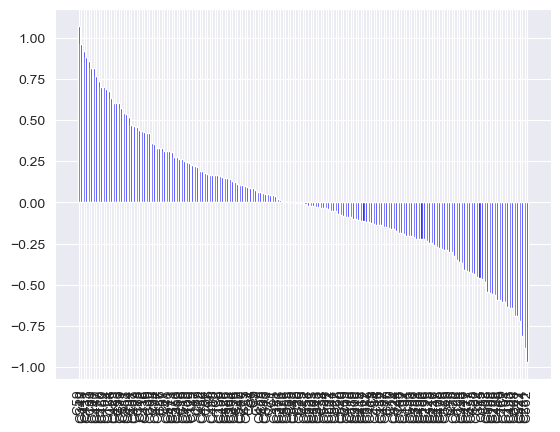

array(['C59', 'C349', 'C445', 'C411', 'C133', 'C80', 'C131', 'C440',
       'C477', 'C120', 'C460', 'C104', 'C124', 'C58', 'C429', 'C483',
       'C33', 'C479', 'C511', 'C588', 'C494', 'C563', 'C525', 'C108',
       'C285', 'C488', 'C448', 'C0', 'C482', 'C101', 'C433', 'C480',
       'C368', 'C41', 'C577', 'C444', 'C281', 'C562'], dtype=object)

In [31]:
# print coefficients

coefficients = pd.DataFrame({'feature': X.columns,'importance':lg.coef_[0]})

coefficients = coefficients.sort_values(by='importance', ascending=False)
print(coefficients)

#plot feature importance
plt.bar(x=coefficients['feature'], height=coefficients['importance'], color ='blue')

plt.xticks(rotation='vertical')
plt.show()

#select important features
important_features = coefficients[abs(coefficients['importance']) > 0.5]['feature'].values
important_features


In [33]:
# rebuild model using important features
x_import = X[important_features]
X_train1, X_test1, y_train, y_test = train_test_split(x_import, Y, test_size=0.3, random_state=95)
model_important = LogisticRegression()
model_important.fit(X_train1, y_train)
pred1 = model_important.predict(X_test1)

In [34]:
plt.figure(figsize=(4,4))
print("Accuracy: ", accuracy_score(y_test, pred1))
print(classification_report(y_test,pred1))

Accuracy:  0.9136690647482014
              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       129
           1       0.00      0.00      0.00        10

    accuracy                           0.91       139
   macro avg       0.46      0.49      0.48       139
weighted avg       0.86      0.91      0.89       139



<Figure size 400x400 with 0 Axes>

# Confusion Matrix

Text(520.4494949494949, 0.5, 'True label')

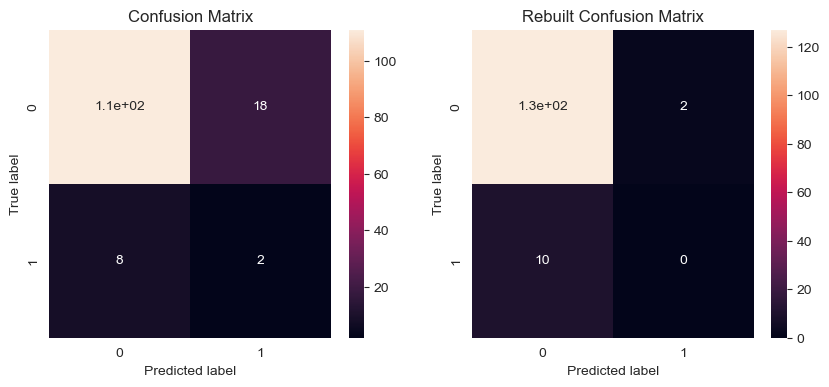

In [35]:
fig= plt.figure(figsize=(10,4))
fig.add_subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
fig.add_subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, pred1), annot=True)
plt.title("Rebuilt Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')

The model got better from the original model with an accuracy score of 81% to an accuracy score of 91% when only important features are used in building the logistic regression model.